In [21]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

In [22]:
net = ContTempNetwork.load('fig3_network_short')
net_heat = ContTempNetwork.load('fig3_network_short_heat')

In [23]:
net.times

Index([0.03594253203905966, 0.12550434086215445,  0.2891270979051699,
        0.3978467929740073,  0.9333652734301466,  0.9557874514740137,
        0.9585869075628479,  1.0403232852158315,  1.1475689986269604,
        1.2388319988378391,
       ...
        48.404625113395426,   48.67124265894022,   48.73788732816989,
         48.95528090067462,   48.97073550216554,   49.21156023382258,
        49.282009432943404,   49.36392178974623,  49.682241569424626,
        49.705797705785685],
      dtype='float64', name='times', length=494)

In [24]:
lamdas=np.logspace(-4,2,200)
between_lamdas=np.linspace(-4,2,200)

# Clustering

In [25]:
# list_forw_flows = []

# for i, l in enumerate(lamdas):
#     with open(f'//scratch/tmp/180/skoove/experiment_short/inter_T/inter_T{l:.06f}', 'rb') as f:
#         T_inter_list = pickle.load(f)['inter_T']

#     list_forw_flows.append(FlowIntegralClustering(T_inter_list=T_inter_list,
#                                   time_list=net.times,
#                                   verbose=True))

In [26]:
# multi_res = {}

# for i, lamda in enumerate(lamdas):
#     flowintegralclustering = list_forw_flows[i]
#     clustering = SparseClustering(p1=flowintegralclustering.p1, p2=None,
#                         T=flowintegralclustering.T_list[-1], S=flowintegralclustering.I_list[0])
#     clusters, stabilites, seeds = parallel_clustering.compute_parallel_clustering(clustering, num_repeat=50, nproc=10, 
#                                 verbose=True, n_meta_iter_max=1000, 
#                                 n_sub_iter_max=1000, 
#                                 clust_verbose=False, print_num_loops=False)
#     multi_res[lamda] = clusters

# file=f'//scratch/tmp/180/skoove/experiment_short/clusters'
# with open(file, 'wb') as fopen:
#     pickle.dump(multi_res, fopen)

In [27]:
with open('//scratch/tmp/180/skoove/experiment_short/clusters', 'rb') as f:
    multi_res = pickle.load(f)

In [28]:
avg_csize_forw = [np.mean([len(c) for c in \
                   multi_res[lamda] if len(c)>1]) for lamda in lamdas]

NVI_forw = [avg_norm_var_information(multi_res[lamda]) for lamda in lamdas]

## Heat version

In [29]:
# #Clustering of heat version

# list_forw_flows_heat = []

# for i, l in enumerate(lamdas):
#     with open(f'//scratch/tmp/180/skoove/experiment_short_heat/inter_T/inter_T{l:.06f}', 'rb') as f:
#         T_inter_list = pickle.load(f)['inter_T']

#     list_forw_flows_heat.append(FlowIntegralClustering(T_inter_list=T_inter_list,
#                                   time_list=net_heat.times,
#                                   verbose=False))

In [30]:
# multi_res_heat = {}

# for i, lamda in enumerate(lamdas):
#     flowintegralclustering = list_forw_flows_heat[i]
#     clustering = SparseClustering(p1=flowintegralclustering.p1, p2=None,
#                         T=flowintegralclustering.T_list[-1], S=flowintegralclustering.I_list[0])
#     clusters, stabilites, seeds = parallel_clustering.compute_parallel_clustering(clustering, num_repeat=50, nproc=10, 
#                                 verbose=True, n_meta_iter_max=1000, 
#                                 n_sub_iter_max=1000, 
#                                 clust_verbose=False, print_num_loops=False)
#     multi_res_heat[lamda] = clusters

# file=f'//scratch/tmp/180/skoove/experiment_short_heat/clusters'
# with open(file, 'wb') as fopen:
#     pickle.dump(multi_res_heat, fopen)

In [31]:
with open('//scratch/tmp/180/skoove/experiment_short_heat/clusters', 'rb') as f:
    multi_res_heat = pickle.load(f)
    
avg_csize_forw_heat = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas]

NVI_forw_heat = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas]

In [32]:
print(avg_csize_forw)
print(avg_csize_forw_heat)

[81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 80.0, 79.0, 77.0, 73.0, 68.0, 63.0, 62.86, 58.9, 57.7, 55.52, 52.0, 51.76, 50.7, 47.58, 45.56, 44.18, 42.38, 38.12, 37.78, 36.42, 35.66, 34.44, 34.1, 29.84, 28.9, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.84, 26.94, 26.76, 25.88, 25.84, 25.84, 25.82, 24.84, 24.8, 24.8, 23.88, 23.88, 23.0, 23.0, 22.0, 22.0, 21.0, 21.0, 20.0, 18.0, 17.98, 17.98, 17.58, 17.52, 17.3, 16.48, 16.48, 16.42, 15.04, 14.28, 14.24, 13.44, 13.5, 13.4, 13.0, 13.0, 12.86, 12.92, 12.84, 12.3, 12.0, 11.96, 11.96, 10.72, 10.6, 10.46, 10.0, 9.98, 9.96, 9.96, 9.94, 9.9, 9.9, 9.62, 8.58, 7.94, 7.72, 7.78, 7.6, 7.74, 7.56, 7.52, 7.5, 7.72, 6.84, 6.68, 6.76, 6.78, 6.58, 6.5, 6.68, 6.72, 6.72, 6.0, 5.96, 6.0, 6.0, 6.0, 6.0, 5.86, 5.92, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5

# Plots

In [33]:
array_81 = np.where(np.array(avg_csize_forw)>80)[0]
start_81 = lamdas[array_81[0]]
end_81 = lamdas[array_81[-1]]

array_27 = np.where(np.logical_and( np.array(avg_csize_forw) < 27.1, np.array(avg_csize_forw) >26.9))[0]
start_27 = lamdas[array_27[0]]
end_27 = lamdas[array_27[-1]]

array_9 = np.where(np.logical_and( np.array(avg_csize_forw) < 9.63, np.array(avg_csize_forw) > 8.57))[0]
start_9 = lamdas[array_9[0]]
end_9 = lamdas[array_9[-1]]

array_5 = np.where(np.logical_and( np.array(avg_csize_forw) < 5.1, np.array(avg_csize_forw) >4.9))[0]
start_5 = lamdas[array_5[0]]
end_5 = lamdas[array_5[-1]]

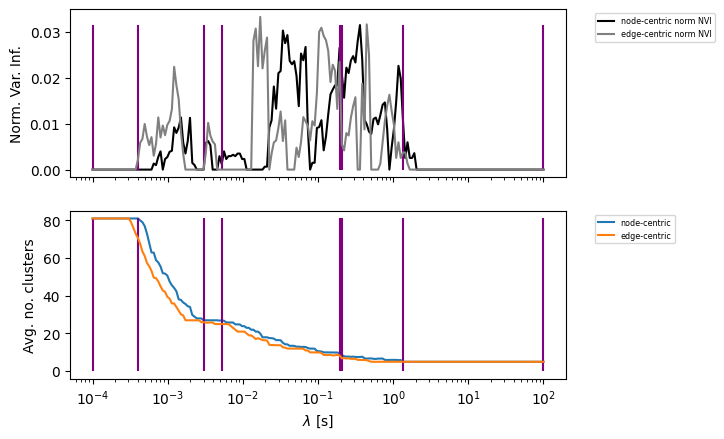

In [34]:
max_NVI = max(NVI_forw)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
ax1.plot(lamdas, NVI_forw, 'black', label='node-centric norm NVI')
ax1.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
           ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI, max_NVI], colors='purple')
ax1.plot(lamdas, NVI_forw_heat, 'grey', label='edge-centric norm NVI')

ax2.plot(lamdas, avg_csize_forw, '-', label='node-centric')
ax2.vlines(x = [start_81, end_81, start_27, end_27, start_9, end_9, start_5, end_5],
           ymin = [0, 0, 0, 0, 0, 0, 0, 0], ymax = [81, 81, 81, 81, 81, 81, 81, 81], colors='purple')
ax2.plot(lamdas, avg_csize_forw_heat, '-', label='edge-centric')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf.')
ax1.legend()
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.set_xlabel(r'$\lambda$ [s]')
ax2.set_ylabel('Avg. no. clusters')
ax2.legend()
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))


# Derivatives

In [35]:
def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

In [36]:
vNS = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_short_static_weighted_heat/vNS/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS.append(S[list(S.keys())[0]][0])

vNSend = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_short_static_weighted_heat/vNSend/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNSend.append(S[list(S.keys())[0]][0])

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


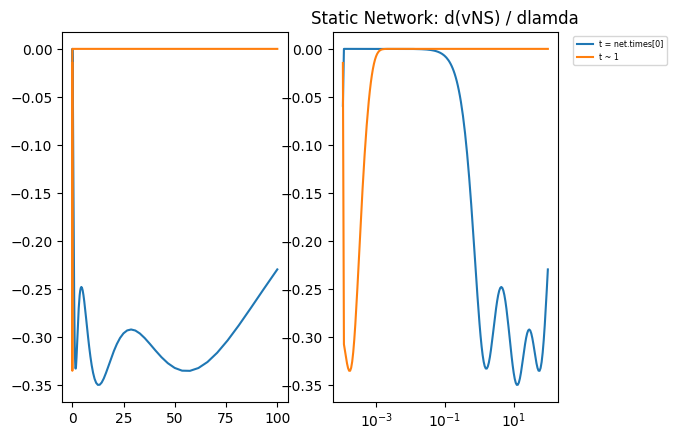

In [37]:
v1 = vNS
w1 = vNSend
v2 = between_lamdas
ds_dt = derivative(v1, v2)
ds7_dt = derivative(w1, v2)

plt.subplot(1, 2, 1)
plt.plot(lamdas[1:], ds_dt)
plt.plot(lamdas[1:], ds7_dt)

plt.subplot(1, 2, 2)
plt.plot(lamdas[1:], ds_dt, label='t = net.times[0]')
plt.plot(lamdas[1:], ds7_dt, label='t ~ 1')
plt.xscale('log')
plt.title('Static Network: d(vNS) / dlamda')
plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
#plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dvNS_dlamda.eps', format='eps')

plt.show()

In [40]:
# RW version

vNS_rw = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_short_static_weighted/vNS/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_rw.append(S[list(S.keys())[0]][0])

vNS7_rw = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_short_static_weighted/vNS7/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS7_rw.append(S[list(S.keys())[0]][0])

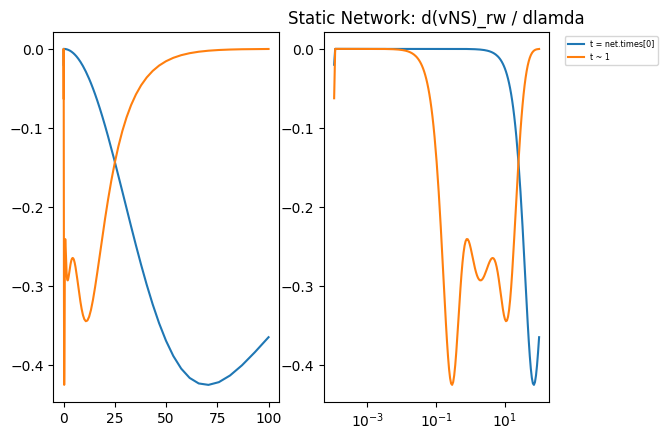

In [41]:
v1 = vNS_rw
w1 = vNS7_rw
v2 = between_lamdas
ds_dt_rw = derivative(v1, v2)
ds7_dt_rw = derivative(w1, v2)

plt.subplot(1, 2, 1)
plt.plot(lamdas[1:], ds_dt_rw)
plt.plot(lamdas[1:], ds7_dt_rw)

plt.subplot(1, 2, 2)
plt.plot(lamdas[1:], ds_dt_rw, label='t = net.times[0]')
plt.plot(lamdas[1:], ds7_dt_rw, label='t ~ 1')
plt.xscale('log')
plt.title('Static Network: d(vNS)_rw / dlamda')
plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
#plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dvNS_dlamda.eps', format='eps')

plt.show()

# comparison

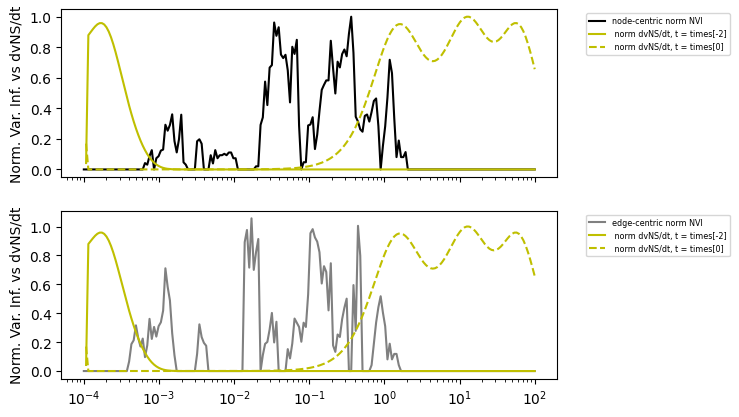

In [39]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

    
ax1.plot(lamdas, NVI_forw / max(NVI_forw), 'black', label='node-centric norm NVI')
ax1.plot(lamdas[1:], ds7_dt / min(ds_dt), 'y', label=' norm dvNS/dt, t = times[-2]')
ax1.plot(lamdas[1:], ds_dt / min(ds_dt), 'y--', label=' norm dvNS/dt, t = times[0]')
ax1.set_xscale('log')

ax1.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.plot(lamdas, NVI_forw_heat / max(NVI_forw), 'grey', label='edge-centric norm NVI')
ax2.plot(lamdas[1:], ds7_dt / min(ds_dt), 'y', label=' norm dvNS/dt, t = times[-2]')
ax2.plot(lamdas[1:], ds_dt / min(ds_dt), 'y--', label=' norm dvNS/dt, t = times[0]')
ax2.set_xscale('log')

ax2.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# Heat vNS

In [42]:
heat_vNSend = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_short_heat/vNSend/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        heat_vNSend.append(S[list(S.keys())[0]][0])

In [43]:
w1 = heat_vNSend
v2 = between_lamdas
heat_ds7_dt = derivative(w1, v2)

# Comparison

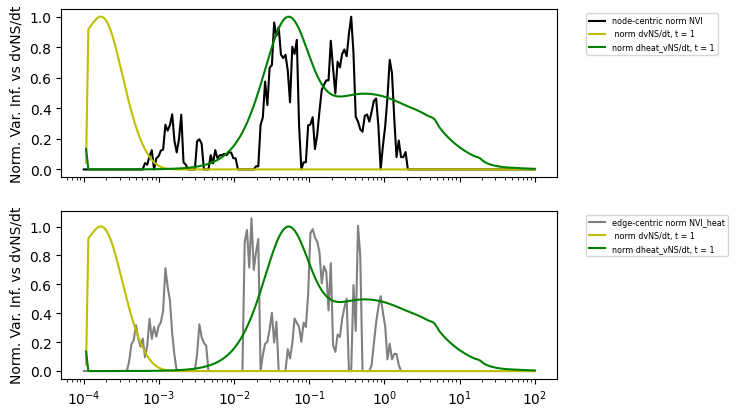

In [44]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(lamdas, NVI_forw / max(NVI_forw), 'black', label='node-centric norm NVI')
ax1.plot(lamdas[1:], ds7_dt / min(ds7_dt), 'y', label=' norm dvNS/dt, t = 1')
ax1.plot(lamdas[1:], heat_ds7_dt / min(heat_ds7_dt), 'g', label='norm dheat_vNS/dt, t = 1')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.plot(lamdas, NVI_forw_heat / max(NVI_forw), 'grey', label='edge-centric norm NVI_heat')
ax2.plot(lamdas[1:], ds7_dt / min(ds7_dt), 'y', label=' norm dvNS/dt, t = 1')
ax2.plot(lamdas[1:], heat_ds7_dt / min(heat_ds7_dt), 'g', label='norm dheat_vNS/dt, t = 1')

ax2.set_xscale('log')
ax2.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

# Temporal vNS

In [30]:
temporal_vNS7 = []
for i, lamda in enumerate(lamdas):
    with open(f'//scratch/tmp/180/skoove/experiment_short/vNS7/vNS{lamda:.06f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        temporal_vNS7.append(S[list(S.keys())[0]][0])

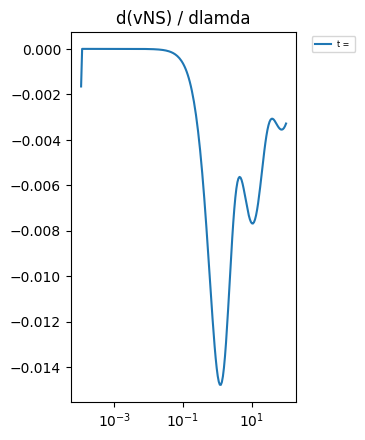

In [31]:

w1 = temporal_vNS7
v2 = between_lamdas
temporal_ds7_dt = derivative(w1, v2)

plt.subplot(1, 2, 2)
plt.plot(lamdas[1:], temporal_ds7_dt, label='t = ')
plt.xscale('log')

plt.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('d(vNS) / dlamda')
#plt.savefig('./figures/fig3_recap_entropy_plots/fig3_dvNS_dlamda.eps', format='eps')

plt.show()

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


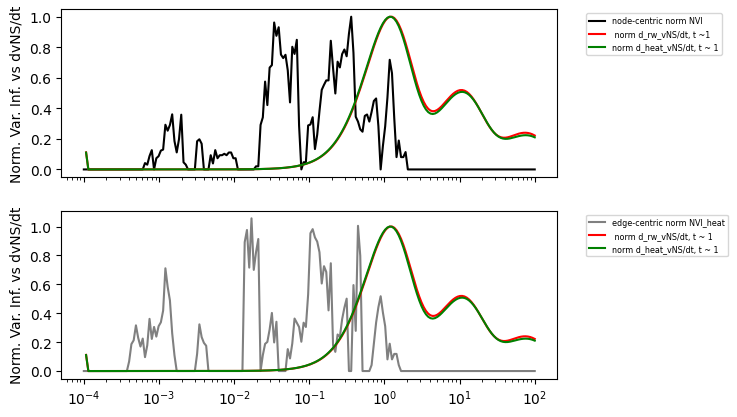

In [33]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(lamdas, NVI_forw / max(NVI_forw), 'black', label='node-centric norm NVI')
ax1.plot(lamdas[1:], temporal_ds7_dt / min(temporal_ds7_dt), 'r', label=' norm d_rw_vNS/dt, t ~1')
ax1.plot(lamdas[1:], heat_ds7_dt / min(heat_ds7_dt), 'g', label='norm d_heat_vNS/dt, t ~ 1')

ax1.set_xscale('log')
ax1.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax1.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

ax2.plot(lamdas, NVI_forw_heat / max(NVI_forw), 'grey', label='edge-centric norm NVI_heat')
ax2.plot(lamdas[1:], temporal_ds7_dt / min(temporal_ds7_dt), 'r', label=' norm d_rw_vNS/dt, t ~ 1')
ax2.plot(lamdas[1:], heat_ds7_dt / min(heat_ds7_dt), 'g', label='norm d_heat_vNS/dt, t ~ 1')

ax2.set_xscale('log')
ax2.set_ylabel('Norm. Var. Inf. vs dvNS/dt')
ax2.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))